In [114]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [2]:
# loading training data
train = pd.read_csv('titanic-train.csv')
train.shape

(891, 11)

In [87]:
# loading testing data
test = pd.read_csv('titanic-test.csv')
test.shape

(418, 11)

In [4]:
# overview of the train dataset
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

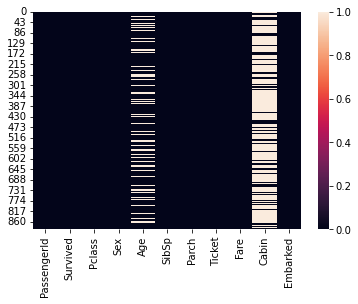

In [6]:
sns.heatmap(train.isnull()) # Age and Cabin has many null values

<AxesSubplot:>

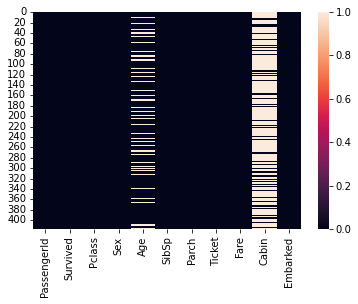

In [7]:
sns.heatmap(test.isnull()) # Age and Cabin has many null values

In [25]:
# converting cabin to binary attribute using dummy variable
train['Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [26]:
# converting sex cateogorical variable to dummy variable
train['Sex'] = train["Sex"].replace({'male':0,'female':1})
test['Sex'] = test["Sex"].replace({'male':0,'female':1})

In [28]:
full_data = [train,test]
full_data

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0              1         0       3    0   22      1      0         A/5 21171   
 1              2         1       1    1   38      1      0          PC 17599   
 2              3         1       3    1   26      0      0  STON/O2. 3101282   
 3              4         1       1    1   35      1      0            113803   
 4              5         0       3    0   35      0      0            373450   
 ..           ...       ...     ...  ...  ...    ...    ...               ...   
 886          887         0       2    0   27      0      0            211536   
 887          888         1       1    1   19      0      0            112053   
 888          889         0       3    1   38      1      2        W./C. 6607   
 889          890         1       1    0   26      0      0            111369   
 890          891         0       3    0   32      0      0            370376   
 
         Fare  Cabin Embar

In [53]:
# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

<AxesSubplot:>

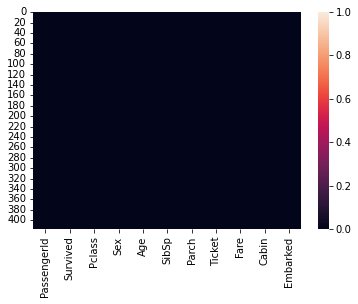

In [55]:
sns.heatmap(test.isnull()) # Age and Cabin has many null values

<AxesSubplot:>

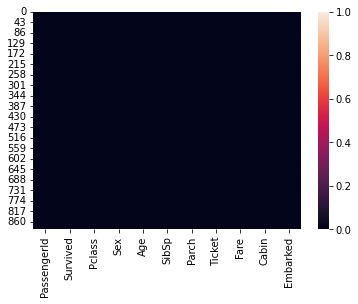

In [56]:
sns.heatmap(train.isnull()) # Age and Cabin has many null values

In [50]:
X_train = train[['Sex','Pclass','Age','SibSp','Parch','Cabin']]
Y_train = train['Survived']
X_test = test[['Sex','Pclass','Age','SibSp','Parch','Cabin']]

In [51]:
X_train

,Sex,Pclass,Age,SibSp,Parch,Cabin
0,0,3,22,1,0,1
1,1,1,38,1,0,1
2,1,3,26,0,0,1
3,1,1,35,1,0,1
4,0,3,35,0,0,1
...,...,...,...,...,...,...
886,0,2,27,0,0,1
887,1,1,19,0,0,1
888,1,3,38,1,2,1
889,0,1,26,0,0,1


In [52]:
X_test

,Sex,Pclass,Age,SibSp,Parch,Cabin
0,0,3,34,0,0,1
1,1,3,47,1,0,1
2,0,2,62,0,0,1
3,0,3,27,0,0,1
4,1,3,22,1,1,1
...,...,...,...,...,...,...
413,0,3,24,0,0,1
414,1,1,39,0,0,1
415,0,3,38,0,0,1
416,0,3,41,0,0,1


In [31]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [90]:
clf = tree.DecisionTreeClassifier(criterion ="entropy",random_state =0)
clf = clf.fit(X_train,Y_train)
y_train_predict = clf.predict(X_train)
test['Survived'] = clf.predict(X_test)

[Text(0.5223102935533385, 0.9736842105263158, 'X[0] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2671119531849578, 0.9210526315789473, 'X[1] <= 1.5\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.179081926323868, 0.868421052631579, 'X[2] <= 53.0\nentropy = 0.95\nsamples = 122\nvalue = [77, 45]'),
 Text(0.13790291634689178, 0.8157894736842105, 'X[2] <= 14.0\nentropy = 0.981\nsamples = 100\nvalue = [58, 42]'),
 Text(0.1317632386799693, 0.7631578947368421, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.14404259401381428, 0.7631578947368421, 'X[2] <= 47.5\nentropy = 0.972\nsamples = 97\nvalue = [58, 39]'),
 Text(0.10466231772831926, 0.7105263157894737, 'X[2] <= 43.0\nentropy = 0.95\nsamples = 84\nvalue = [53, 31]'),
 Text(0.056600153491941675, 0.6578947368421053, 'X[2] <= 22.5\nentropy = 0.98\nsamples = 72\nvalue = [42, 30]'),
 Text(0.024558710667689946, 0.6052631578947368, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 12\nvalue = [9, 3]'),
 Text(

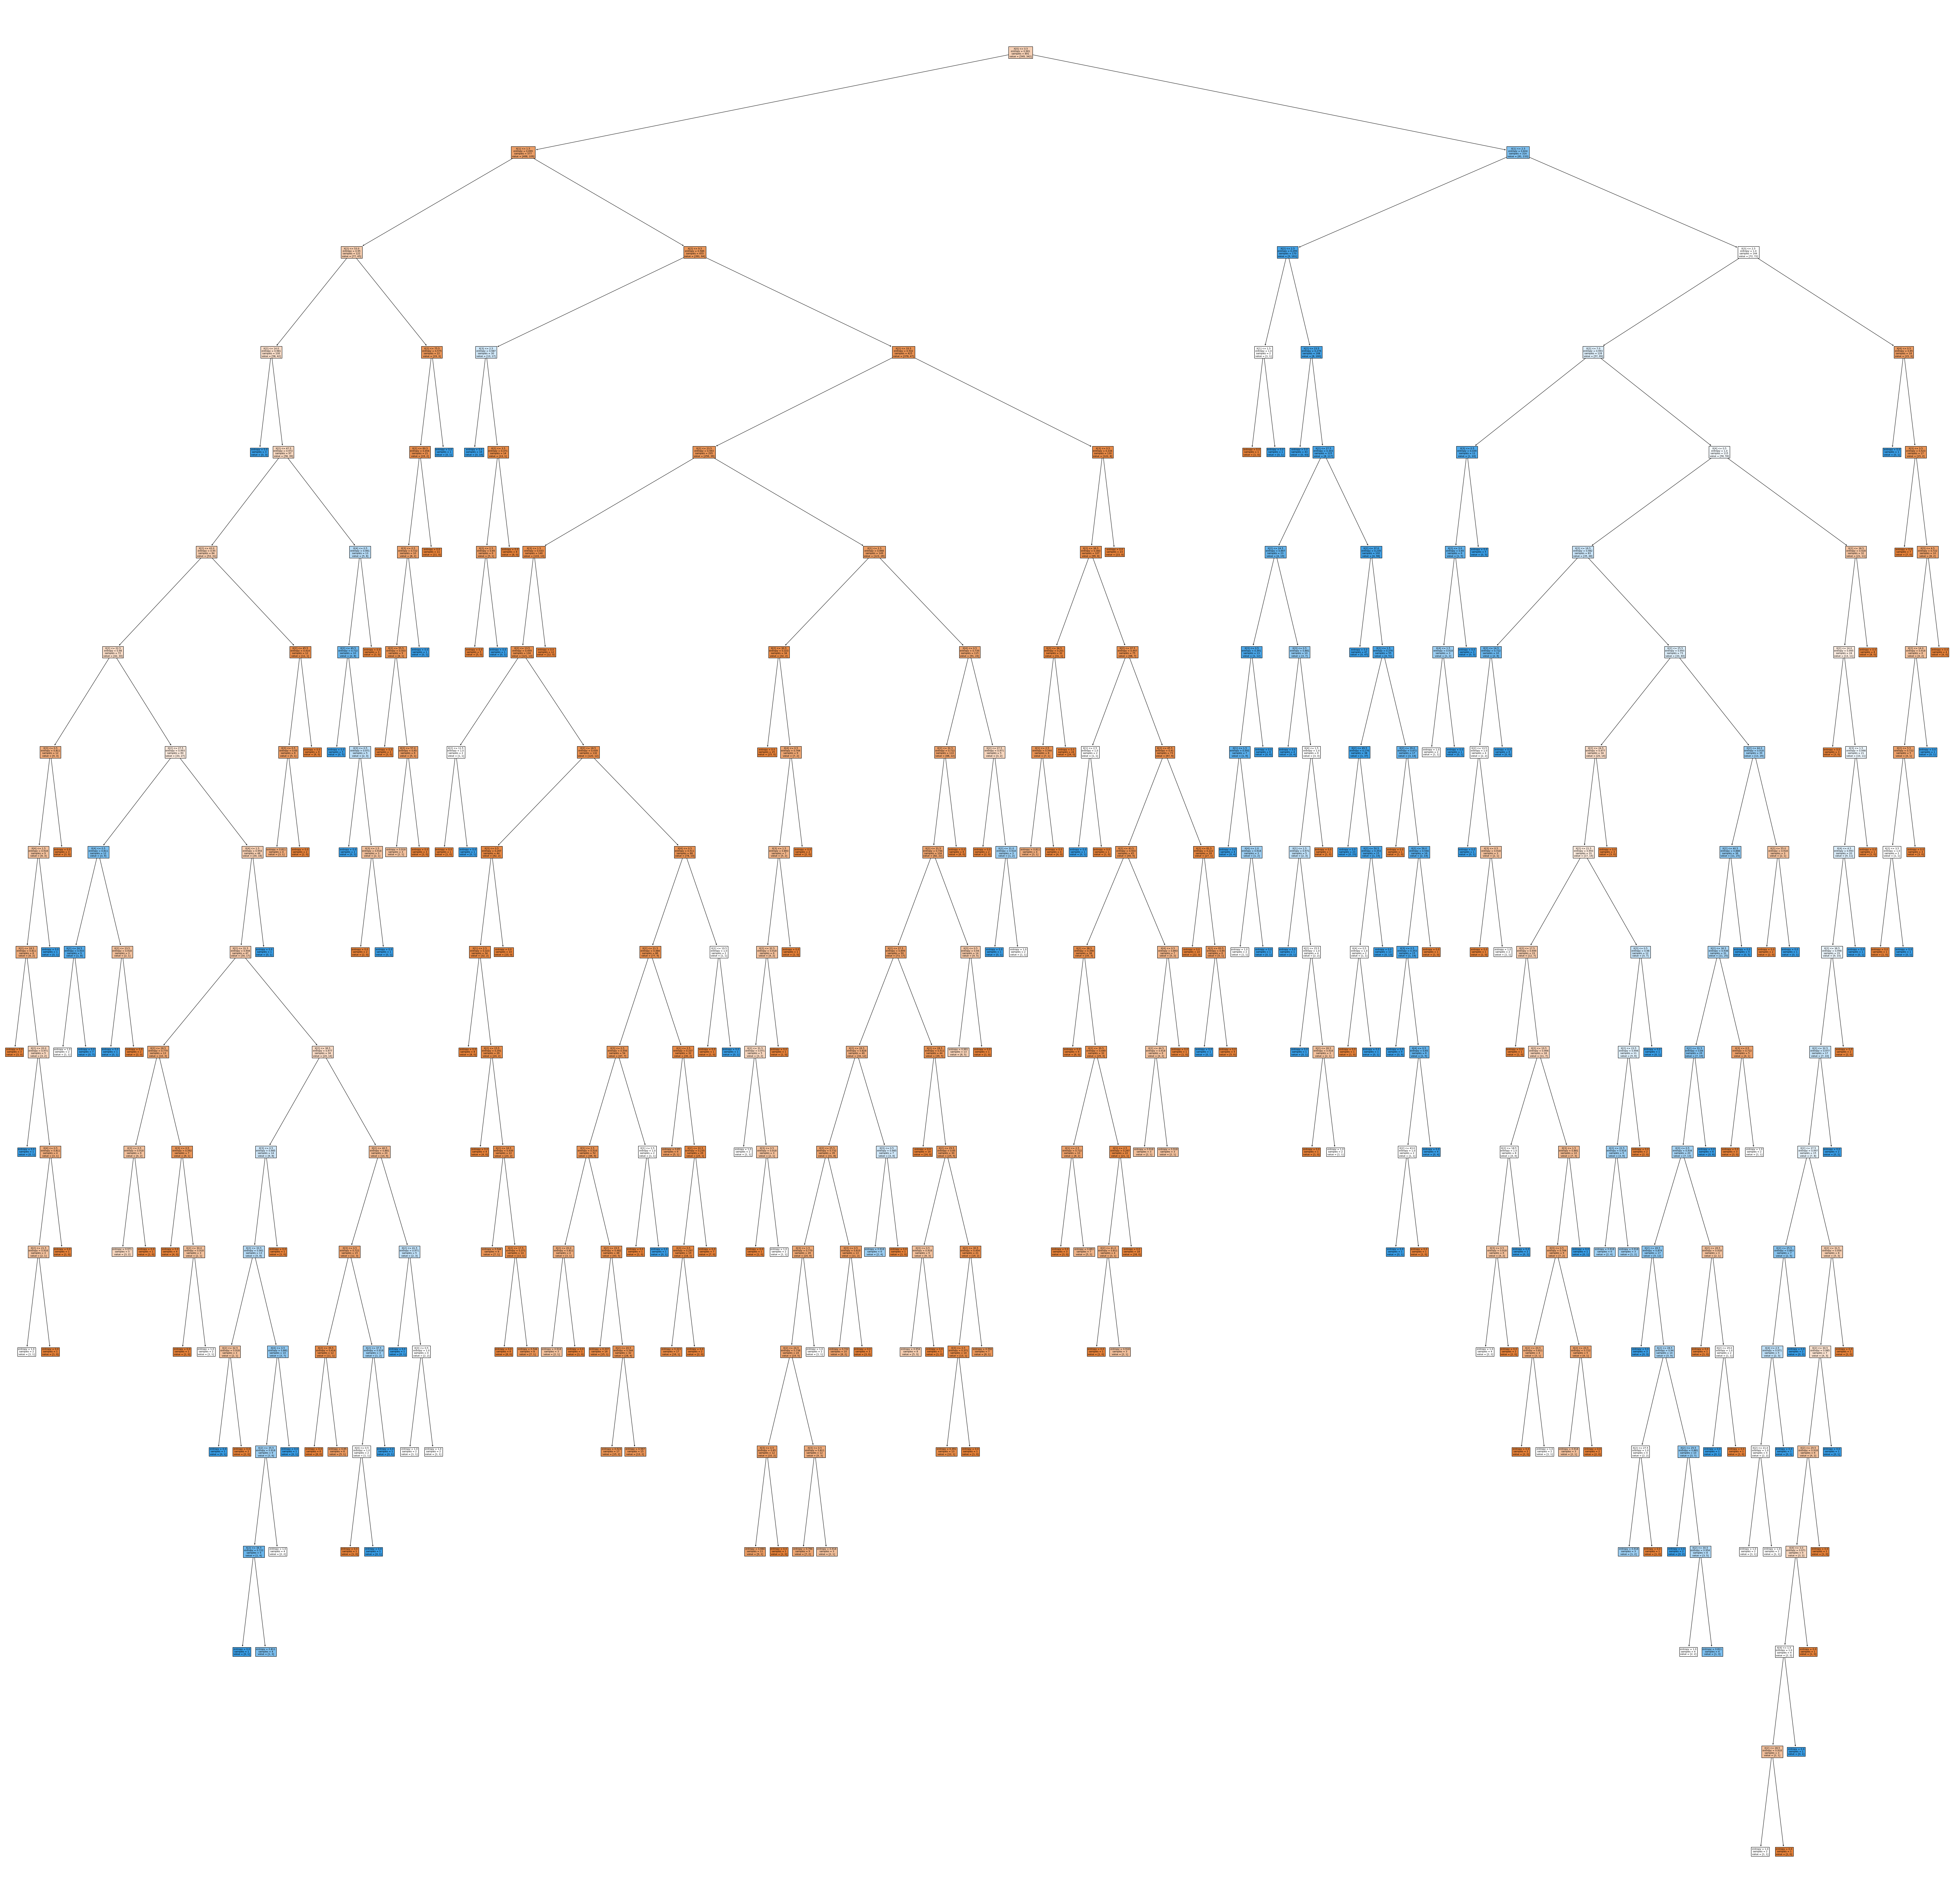

In [46]:
plt.figure(figsize=(100,100))
tree.plot_tree(clf,filled=True)

In [47]:
print(tree.export_text(clf))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_2 <= 53.00
|   |   |   |--- feature_2 <= 14.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  14.00
|   |   |   |   |--- feature_2 <= 47.50
|   |   |   |   |   |--- feature_2 <= 43.00
|   |   |   |   |   |   |--- feature_2 <= 22.50
|   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 18.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  18.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 20.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  20.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fea

### Model Evaluation - using confusion matrix and F1 - Score

##### How well did it perform on the training data? 

In [77]:
pd.crosstab(Y_train,y_train_predict,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,541,8
1,63,279


In [113]:
matrix = confusion_matrix(Y_train,y_train_predict)
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_train,y_train_predict)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[541   8]
 [ 63 279]]
Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       549
           1       0.97      0.82      0.89       342

    accuracy                           0.92       891
   macro avg       0.93      0.90      0.91       891
weighted avg       0.93      0.92      0.92       891



#### precision and recall of the model for survived is above 0.80. 

#### precision and recall of the model for died is above 0.90. This results in higher F1-score. F1- Score of the model is 0.94 on the training dataset. The closer it is to 1, the better the model.

#### Model seems to be really good with Accuracy of of 0.92

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

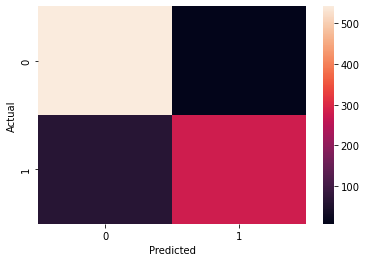

In [80]:
sns.heatmap(pd.crosstab(Y_train,y_train_predict,rownames=['Actual'],colnames=['Predicted']))

##### What percentage of individuals in the test data survived?

<AxesSubplot:ylabel='Survived'>

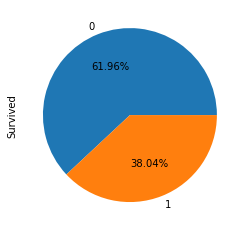

In [112]:
test['Survived'].value_counts().plot( kind='pie',autopct='%.2f%%')

#### In the test data, 62% individuals survived